<a href="https://colab.research.google.com/github/FotonAlhothli/Task1_Foton_Alhothi/blob/main/Weekly_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Weekly Project 2!

## Introduction to Road Traffic Accidents (RTA) Dataset

### Dataset Overview
The RTA Dataset provides a detailed snapshot of road traffic accidents, capturing a range of data from accident conditions to casualty details. This dataset is essential for analyzing patterns and causes of accidents to improve road safety.

### Data Characteristics
- **Entries**: The dataset contains 12,316 entries.
- **Features**: There are 32 features in the dataset, which include:
  - `Time`: Time when the accident occurred.
  - `Day_of_week`: Day of the week.
  - `Age_band_of_driver`: Age group of the driver involved.
  - `Sex_of_driver`: Gender of the driver.
  - `Educational_level`: Educational level of the driver.
  - `Type_of_vehicle`: Type of vehicle involved in the accident.
  - `Cause_of_accident`: Reported cause of the accident.
  - `Accident_severity`: Severity of the accident.
- **Target Column**: `Accident_severity` is used as the target column for modeling. This feature classifies the severity of each accident.

### Objective
Students will use this dataset to apply various data visualization, modeling, and evaluation techniques learned in class. The primary goal is to build models that can accurately predict the severity of accidents and to identify the key factors that contribute to severe accidents.

## Import Libraries
Import all the necessary libraries here. Include libraries for handling data (like pandas), visualization (like matplotlib and seaborn), and modeling (like scikit-learn).

In [ ]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import accuracy_score

## Load Data
Load the dataset from the provided CSV file into a DataFrame.

In [ ]:
df = pd.read_csv('RTA_Dataset.csv')

## Exploratory Data Analysis (EDA)
Perform EDA to understand the data better. This involves several steps to summarize the main characteristics, uncover patterns, and establish relationships:
* Find the dataset information and observe the datatypes.
* Check the shape of the data to understand its structure.
* View the the data with various functions to get an initial sense of the data.
* Perform summary statistics on the dataset to grasp central tendencies and variability.
* Check for duplicated data.
* Check for null values.

And apply more if needed!


In [ ]:
df.head()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,NaN,...,Going straight,Driver or rider,Male,31-50,3,Driver,NaN,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,NaN,...,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,NaN,Owner,5-10yrs,...,Going straight,na,na,na,na,NaN,NaN,Not a Pedestrian,Overtaking,Slight Injury


In [ ]:
df.tail()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
12311,16:15:00,Wednesday,31-50,Male,NaN,Employee,2-5yr,Lorry (11?40Q),Owner,NaN,...,Going straight,na,na,na,na,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
12312,18:00:00,Sunday,Unknown,Male,Elementary school,Employee,5-10yr,Automobile,Owner,NaN,...,Other,na,na,na,na,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
12313,13:55:00,Sunday,Over 51,Male,Junior high school,Employee,5-10yr,Bajaj,Owner,2-5yrs,...,Other,Driver or rider,Male,31-50,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Serious Injury
12314,13:55:00,Sunday,18-30,Female,Junior high school,Employee,Above 10yr,Lorry (41?100Q),Owner,2-5yrs,...,Other,na,na,na,na,Driver,Normal,Not a Pedestrian,Driving under the influence of drugs,Slight Injury
12315,13:55:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Other,Owner,2-5yrs,...,Stopping,Pedestrian,Female,5,3,Driver,Normal,Crossing from nearside - masked by parked or s...,Changing lane to the right,Slight Injury


In [ ]:
df.sample(10)

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
9195,11:48:00,Sunday,Over 51,Male,Junior high school,Employee,Above 10yr,Automobile,Owner,Unknown,...,NaN,Passenger,Female,31-50,3,Driver,Normal,Not a Pedestrian,Driving to the left,Slight Injury
10661,11:45:00,Saturday,31-50,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,Unknown,...,Going straight,Driver or rider,Male,18-30,3,Self-employed,Normal,Not a Pedestrian,No priority to vehicle,Slight Injury
7886,13:40:00,Saturday,Unknown,Male,Junior high school,Employee,2-5yr,Automobile,Owner,1-2yr,...,Going straight,na,na,na,na,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
3326,13:24:00,Sunday,Over 51,Male,Junior high school,Employee,2-5yr,Lorry (41?100Q),NaN,NaN,...,Other,Driver or rider,Male,18-30,3,NaN,NaN,Not a Pedestrian,No distancing,Slight Injury
881,13:32:00,Wednesday,Over 51,Male,Elementary school,Owner,5-10yr,Motorcycle,Owner,2-5yrs,...,Turnover,Driver or rider,Male,18-30,3,Driver,Normal,Not a Pedestrian,No distancing,Slight Injury
11158,13:05:00,Monday,Over 51,Female,Junior high school,Employee,1-2yr,Turbo,Owner,Unknown,...,Going straight,Passenger,Female,Under 18,3,Driver,Normal,Not a Pedestrian,Driving carelessly,Serious Injury
935,9:36:00,Saturday,18-30,Male,Junior high school,Employee,5-10yr,Turbo,Owner,2-5yrs,...,Going straight,Driver or rider,Male,31-50,3,NaN,NaN,Not a Pedestrian,Changing lane to the right,Slight Injury
7280,11:29:00,Sunday,31-50,Male,NaN,NaN,NaN,Lorry (11?40Q),Owner,NaN,...,Going straight,Pedestrian,Male,18-30,3,NaN,NaN,Crossing from nearside - masked by parked or s...,Overtaking,Serious Injury
1657,16:00:00,Wednesday,18-30,Male,Elementary school,Employee,Below 1yr,Automobile,Owner,Unknown,...,Going straight,na,na,na,na,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
7405,16:10:00,Monday,Under 18,Male,Elementary school,Employee,2-5yr,Lorry (41?100Q),Owner,2-5yrs,...,NaN,Driver or rider,Male,18-30,3,NaN,Normal,Not a Pedestrian,Moving Backward,Slight Injury


In [ ]:
df.isna().sum()

,0
Time,0
Day_of_week,0
Age_band_of_driver,0
Sex_of_driver,0
Educational_level,741
Vehicle_driver_relation,579
Driving_experience,829
Type_of_vehicle,950
Owner_of_vehicle,482
Service_year_of_vehicle,3928


In [ ]:
for col in df.columns:
  print(df[col].value_counts(), '\n')

Time
15:30:00    120
17:10:00    110
18:30:00    103
11:30:00     99
17:00:00     98
           ... 
19:04:00      1
20:36:00      1
22:54:00      1
21:03:00      1
2:47:00       1
Name: count, Length: 1074, dtype: int64 

Day_of_week
Friday       2041
Thursday     1851
Wednesday    1840
Tuesday      1770
Monday       1681
Saturday     1666
Sunday       1467
Name: count, dtype: int64 

Age_band_of_driver
18-30       4271
31-50       4087
Over 51     1585
Unknown     1548
Under 18     825
Name: count, dtype: int64 

Sex_of_driver
Male       11437
Female       701
Unknown      178
Name: count, dtype: int64 

Educational_level
Junior high school    7619
Elementary school     2163
High school           1110
Above high school      362
Writing & reading      176
Unknown                100
Illiterate              45
Name: count, dtype: int64 

Vehicle_driver_relation
Employee    9627
Owner       1973
Other        123
Unknown       14
Name: count, dtype: int64 

Driving_experience
5-10yr      

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Data columns (total 32 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Time                         12316 non-null  object
 1   Day_of_week                  12316 non-null  object
 2   Age_band_of_driver           12316 non-null  object
 3   Sex_of_driver                12316 non-null  object
 4   Educational_level            11575 non-null  object
 5   Vehicle_driver_relation      11737 non-null  object
 6   Driving_experience           11487 non-null  object
 7   Type_of_vehicle              11366 non-null  object
 8   Owner_of_vehicle             11834 non-null  object
 9   Service_year_of_vehicle      8388 non-null   object
 10  Defect_of_vehicle            7889 non-null   object
 11  Area_accident_occured        12077 non-null  object
 12  Lanes_or_Medians             11931 non-null  object
 13  Road_allignment              12

In [ ]:
df.describe()

,Number_of_vehicles_involved,Number_of_casualties
count,12316.000000,12316.000000
mean,2.040679,1.548149
std,0.688790,1.007179
min,1.000000,1.000000
25%,2.000000,1.000000
50%,2.000000,1.000000
75%,2.000000,2.000000
max,7.000000,8.000000


## Data Preprocessing
Data preprocessing is essential for transforming raw data into a format suitable for further analysis and modeling. Follow these steps to ensure your data is ready for predictive modeling or advanced analytics:
- **Handling Missing Values**: Replace missing values with appropriate statistics (mean, median, mode) or use more complex imputation techniques.
- **Normalization/Scaling**: Scale data to a small, specified range like 0 to 1, or transform it to have a mean of zero and a standard deviation of one.
- **Label Encoding**: Convert categorical text data into model-understandable numbers where the labels are ordered.
- **One-Hot Encoding**: Use for nominal categorical data where no ordinal relationship exists to transform the data into a binary column for each category. (Be careful not to increase the dimensionality significantly)
- **Detection and Treatment of Outliers**: Use statistical tests, box plots, or scatter plots to identify outliers and then cap, trim, or use robust methods to reduce the effect of outliers, depending on the context.
- **Feature Engineering**: Enhance your dataset by creating new features and transforming existing ones. This might involve combining data from different columns, applying transformations, or reducing dimensionality with techniques like PCA to improve model performance.

Consider these steps as a foundation, and feel free to introduce additional preprocessing techniques as needed to address specific characteristics of your dataset.

In [ ]:
#Handling Missing Values
df.fillna('  ', inplace=True)
df.head()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,...,Going straight,na,na,na,na,,,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public (> 45 seats),Owner,5-10yrs,...,Going straight,na,na,na,na,,,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry (41?100Q),Owner,,...,Going straight,Driver or rider,Male,31-50,3,Driver,,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public (> 45 seats),Governmental,,...,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,,Owner,5-10yrs,...,Going straight,na,na,na,na,,,Not a Pedestrian,Overtaking,Slight Injury


In [ ]:
#Handling Missing Values
df['Type_of_vehicle'] = df['Type_of_vehicle'].replace(['Public (> 45 seats)', 'Public (13?45 seats)'], 'Public')
df['Type_of_vehicle'] = df['Type_of_vehicle'].replace('Lorry (41?100Q)', 'Lorry')
df['Type_of_vehicle'] = df['Type_of_vehicle'].fillna('  ')
df.head(10)

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,17:02:00,Monday,18-30,Male,Above high school,Employee,1-2yr,Automobile,Owner,Above 10yr,...,Going straight,na,na,na,na,,,Not a Pedestrian,Moving Backward,Slight Injury
1,17:02:00,Monday,31-50,Male,Junior high school,Employee,Above 10yr,Public,Owner,5-10yrs,...,Going straight,na,na,na,na,,,Not a Pedestrian,Overtaking,Slight Injury
2,17:02:00,Monday,18-30,Male,Junior high school,Employee,1-2yr,Lorry,Owner,,...,Going straight,Driver or rider,Male,31-50,3,Driver,,Not a Pedestrian,Changing lane to the left,Serious Injury
3,1:06:00,Sunday,18-30,Male,Junior high school,Employee,5-10yr,Public,Governmental,,...,Going straight,Pedestrian,Female,18-30,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,1:06:00,Sunday,18-30,Male,Junior high school,Employee,2-5yr,,Owner,5-10yrs,...,Going straight,na,na,na,na,,,Not a Pedestrian,Overtaking,Slight Injury
5,14:15:00,Friday,31-50,Male,,Unknown,,,,,...,U-Turn,Driver or rider,Male,31-50,3,Driver,Normal,Not a Pedestrian,Overloading,Slight Injury
6,17:30:00,Wednesday,18-30,Male,Junior high school,Employee,2-5yr,Automobile,Owner,,...,Moving Backward,Driver or rider,Female,18-30,3,Driver,Normal,Not a Pedestrian,Other,Slight Injury
7,17:20:00,Friday,18-30,Male,Junior high school,Employee,2-5yr,Automobile,Governmental,Above 10yr,...,U-Turn,na,na,na,na,,Normal,Not a Pedestrian,No priority to vehicle,Slight Injury
8,17:20:00,Friday,18-30,Male,Junior high school,Employee,Above 10yr,Lorry,Owner,1-2yr,...,Going straight,Pedestrian,Male,Under 18,3,Driver,Normal,Crossing from driver's nearside,Changing lane to the right,Slight Injury
9,17:20:00,Friday,18-30,Male,Junior high school,Employee,1-2yr,Automobile,Owner,2-5yrs,...,U-Turn,Passenger,Male,18-30,3,Driver,Normal,Not a Pedestrian,Moving Backward,Serious Injury


In [ ]:

# List of columns to one-hot encode
columns_to_encode = ['Sex_of_driver', 'Educational_level', 'Type_of_vehicle',
                     'Owner_of_vehicle', 'Area_accident_occured', 'Lanes_or_Medians',
                     'Road_surface_type', 'Road_surface_conditions',
                     'Light_conditions', 'Weather_conditions', 'Type_of_collision',
                     'Number_of_vehicles_involved', 'Number_of_casualties',
                     'Vehicle_movement', 'Casualty_class', 'Sex_of_casualty',
                     'Cause_of_accident']


columns_to_encode = [col for col in columns_to_encode if col in df.columns]
df_encoded = pd.get_dummies(df, columns=columns_to_encode)


In [ ]:
df.head()

,Time,Day_of_week,Age_band_of_driver,Sex_of_driver,Educational_level,Vehicle_driver_relation,Driving_experience,Type_of_vehicle,Owner_of_vehicle,Service_year_of_vehicle,...,Vehicle_movement,Casualty_class,Sex_of_casualty,Age_band_of_casualty,Casualty_severity,Work_of_casuality,Fitness_of_casuality,Pedestrian_movement,Cause_of_accident,Accident_severity
0,420,1,0,Male,Above high school,Employee,1,Automobile,Owner,4,...,Going straight,na,na,5,na,,,Not a Pedestrian,Moving Backward,Slight Injury
1,420,1,1,Male,Junior high school,Employee,4,Public,Owner,3,...,Going straight,na,na,5,na,,,Not a Pedestrian,Overtaking,Slight Injury
2,420,1,0,Male,Junior high school,Employee,1,Lorry,Owner,0,...,Going straight,Driver or rider,Male,1,3,Driver,,Not a Pedestrian,Changing lane to the left,Serious Injury
3,594,3,0,Male,Junior high school,Employee,3,Public,Governmental,0,...,Going straight,Pedestrian,Female,0,3,Driver,Normal,Not a Pedestrian,Changing lane to the right,Slight Injury
4,594,3,0,Male,Junior high school,Employee,2,,Owner,3,...,Going straight,na,na,5,na,,,Not a Pedestrian,Overtaking,Slight Injury


In [ ]:
import pandas as pd

categorical_cols = ['Sex_of_driver', 'Educational_level', 'Type_of_vehicle', 'Cause_of_accident', 'Day_of_week']

# Check if the categorical columns exist in the DataFrame
existing_cols = [col for col in categorical_cols if col in df.columns]

# Perform one-hot encoding only for existing categorical columns
if existing_cols:
    df_encoded = pd.get_dummies(df, columns=existing_cols, drop_first=True)
    print(df_encoded.head())
else:
    print("Some of the specified categorical columns do not exist in the DataFrame.")


   Time  Age_band_of_driver Vehicle_driver_relation  Driving_experience  \
0   420                   0                Employee                   1   
1   420                   1                Employee                   4   
2   420                   0                Employee                   1   
3   594                   0                Employee                   3   
4   594                   0                Employee                   2   

  Owner_of_vehicle  Service_year_of_vehicle Defect_of_vehicle  \
0            Owner                        4         No defect   
1            Owner                        3         No defect   
2            Owner                        0         No defect   
3     Governmental                        0         No defect   
4            Owner                        3         No defect   

  Area_accident_occured   Lanes_or_Medians  \
0     Residential areas                      
1          Office areas  Undivided Two way   
2    Recreational ar

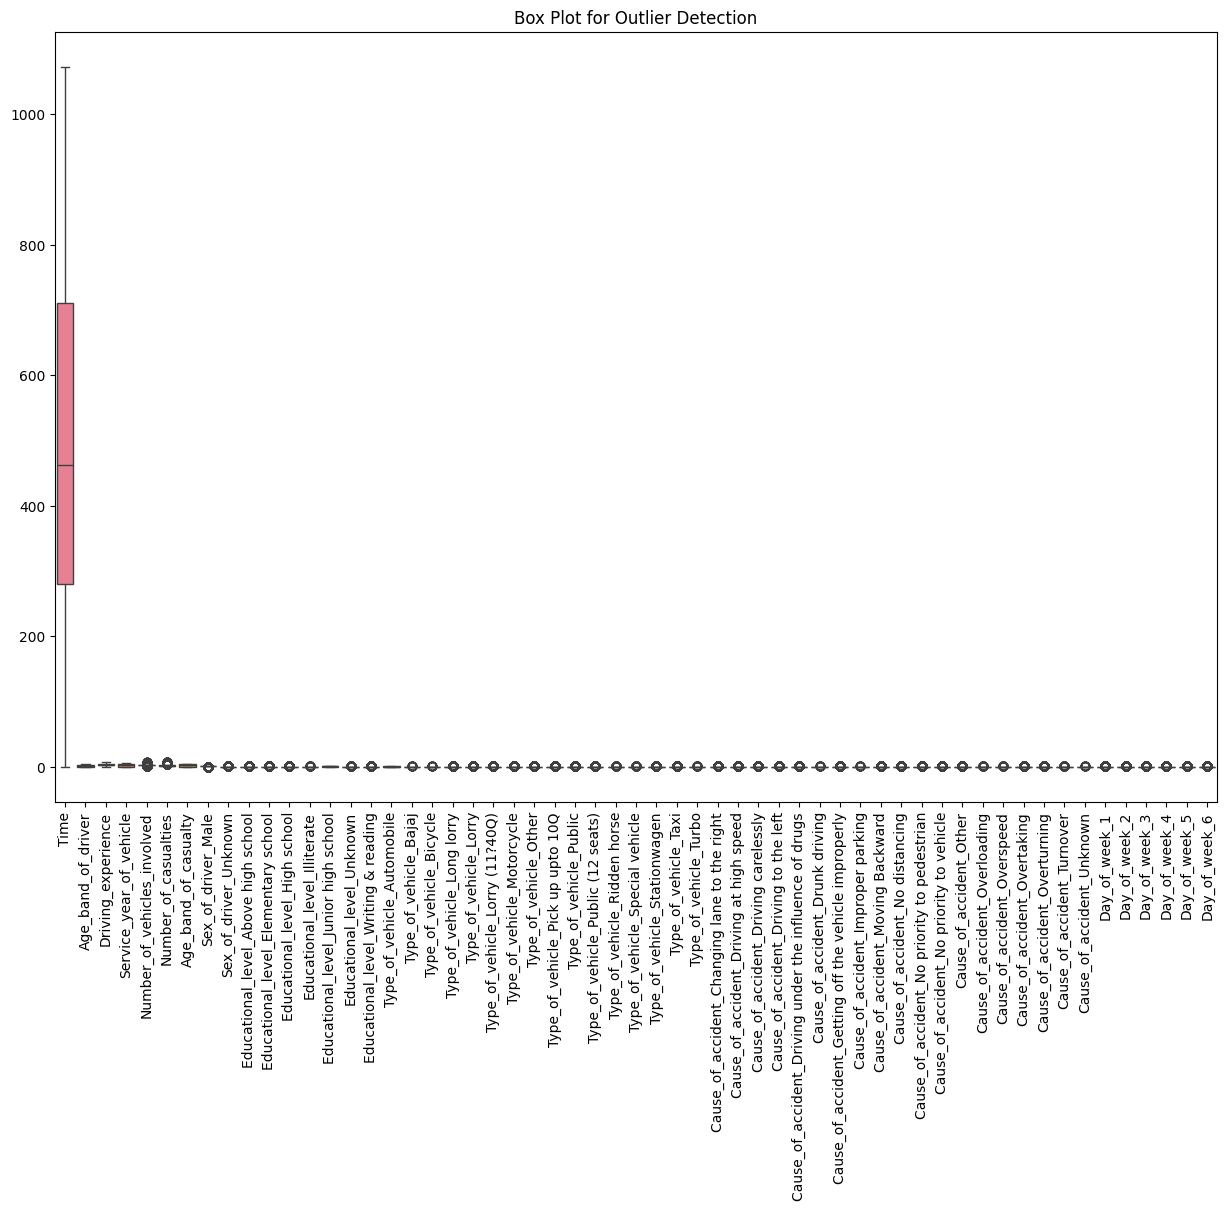

In [ ]:
#box plots to find the outliers
plt.figure(figsize=(15, 10))
sns.boxplot(data=df_encoded)
plt.xticks(rotation=90)
plt.title('Box Plot for Outlier Detection')
plt.show()

In [ ]:
#Feature Engineering
#number of accident agrouped by Cause of accident to creat a new feature
accident_counts = df.groupby('Cause_of_accident')['Accident_severity'].count()
print(accident_counts)

Cause_of_accident
Changing lane to the left               1473
Changing lane to the right              1808
Driving at high speed                    174
Driving carelessly                      1402
Driving to the left                      284
Driving under the influence of drugs     340
Drunk driving                             27
Getting off the vehicle improperly       197
Improper parking                          25
Moving Backward                         1137
No distancing                           2263
No priority to pedestrian                721
No priority to vehicle                  1207
Other                                    456
Overloading                               59
Overspeed                                 61
Overtaking                               430
Overturning                              149
Turnover                                  78
Unknown                                   25
Name: Accident_severity, dtype: int64


In [ ]:
#Feature Engineering
#number of accident agrouped by each Day_of_week
accident_counts_by_day = df.groupby('Day_of_week')['Accident_severity'].count()
print(accident_counts_by_day)

Day_of_week
0    2041
1    1681
2    1666
3    1467
4    1851
5    1770
6    1840
Name: Accident_severity, dtype: int64


In [ ]:
# Convert float64 columns to int64
for col in df_encoded.select_dtypes(include=['float64']):
  df_encoded[col] = df_encoded[col].astype('int64')
df_encoded.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12316 entries, 0 to 12315
Columns: 160 entries, Time to Cause_of_accident_Unknown
dtypes: bool(145), int64(6), object(9)
memory usage: 3.1+ MB


In [ ]:
#convert to numerical
le = LabelEncoder()
df['Time'] = le.fit_transform(df['Time'])
df['Age_band_of_driver'] = le.fit_transform(df['Age_band_of_driver'])
df['Driving_experience'] = le.fit_transform(df['Driving_experience'])
df['Service_year_of_vehicle'] = le.fit_transform(df['Service_year_of_vehicle'])
df['Age_band_of_casualty'] = le.fit_transform(df['Age_band_of_casualty'])

In [ ]:
#convert Day_of_week to catigorical

label_encoder = LabelEncoder()
df['Day_of_week'] = label_encoder.fit_transform(df['Day_of_week'])


In [ ]:
df.dtypes

,0
Time,int64
Day_of_week,int64
Age_band_of_driver,int64
Sex_of_driver,object
Educational_level,object
Vehicle_driver_relation,object
Driving_experience,int64
Type_of_vehicle,object
Owner_of_vehicle,object
Service_year_of_vehicle,int64


## Data Visualization
Create various plots to visualize the relationships in the data. Consider using the following to show different aspects of the data:

* Heatmap of Correlation Matrix.
* Line plots.
* Scatter plots.
* Histograms.
* Boxplots.

Use more if needed!

**Heatmap of Correlation Matrix.**

In [48]:
correlation_matrix = df_encoded.corr()

# Create a heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()

ValueError: could not convert string to float: 'Employee'

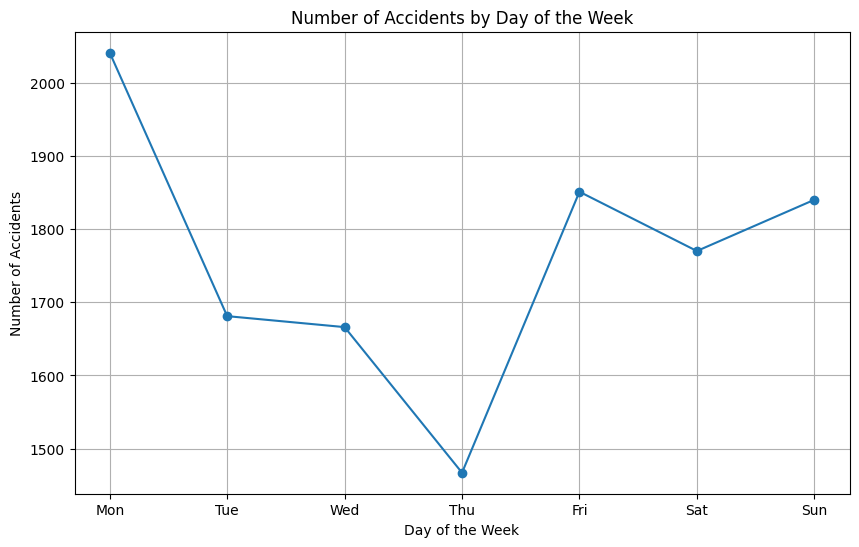

In [49]:
# Line plots show each Day_of_week and  accident_counts

daily_accidents = df.groupby('Day_of_week')['Accident_severity'].count()

plt.figure(figsize=(10, 6))
plt.plot(daily_accidents.index, daily_accidents.values, marker='o')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Accidents')
plt.title('Number of Accidents by Day of the Week')
plt.xticks(range(7), ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])
plt.grid(True)
plt.show()

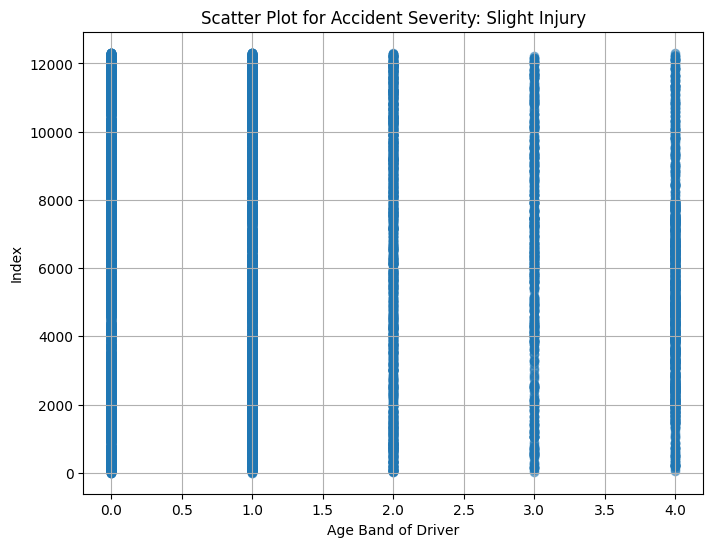

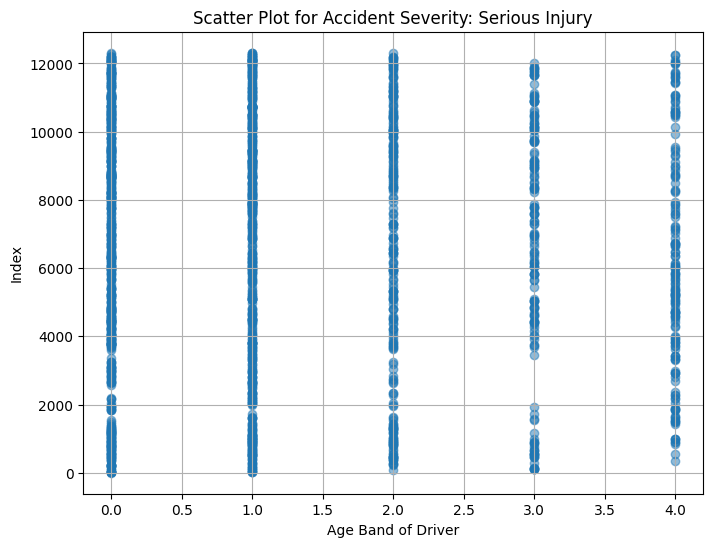

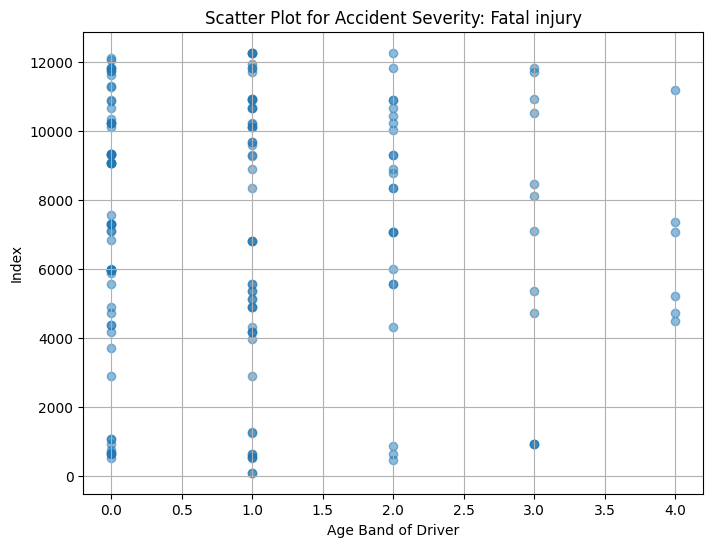

In [50]:
severities = df['Accident_severity'].unique()

for severity in severities:
  df_subset = df[df['Accident_severity'] == severity]
  plt.figure(figsize=(8, 6))
  plt.scatter(df_subset['Age_band_of_driver'], df_subset.index, alpha=0.5)
  plt.xlabel('Age Band of Driver')
  plt.ylabel('Index')
  plt.title(f'Scatter Plot for Accident Severity: {severity}')
  plt.grid(True)
  plt.show()


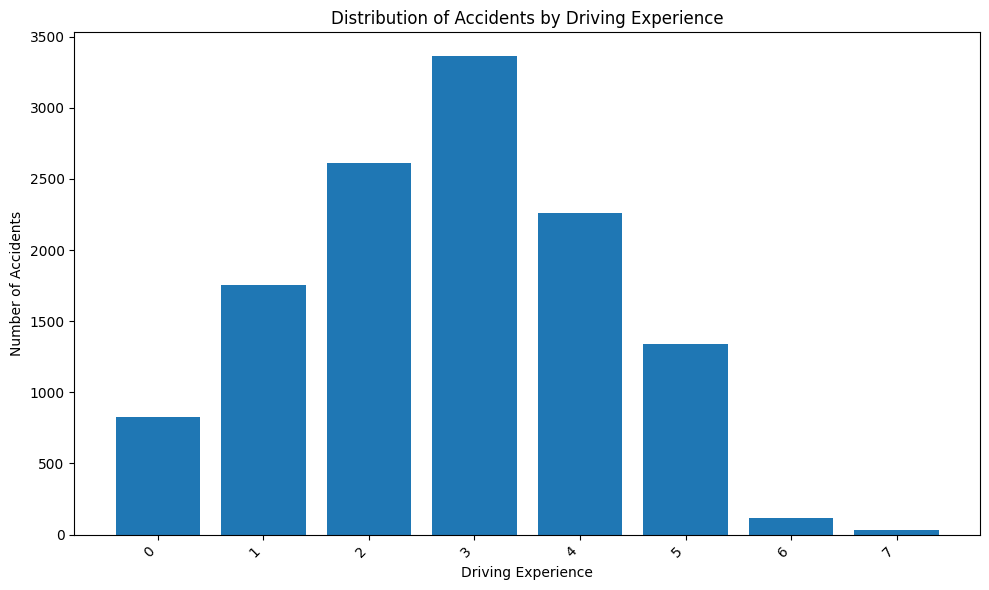

In [51]:
# Histograms shows Driving_experience and accident_counts
experience_counts = df['Driving_experience'].value_counts()

plt.figure(figsize=(10, 6))
plt.bar(experience_counts.index, experience_counts.values)
plt.xlabel('Driving Experience')
plt.ylabel('Number of Accidents')
plt.title('Distribution of Accidents by Driving Experience')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

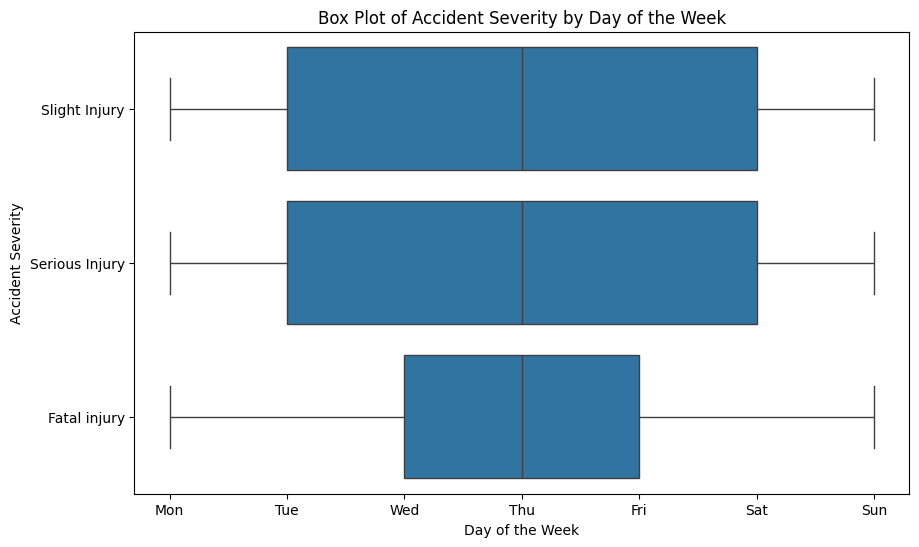

In [52]:
#Boxplots Day_of_week and accident_counts

plt.figure(figsize=(10, 6))
sns.boxplot(x='Day_of_week', y='Accident_severity', data=df)
plt.xlabel('Day of the Week')
plt.ylabel('Accident Severity')
plt.title('Box Plot of Accident Severity by Day of the Week')
plt.xticks(range(7), ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun'])  # Set x-axis labels
plt.show()

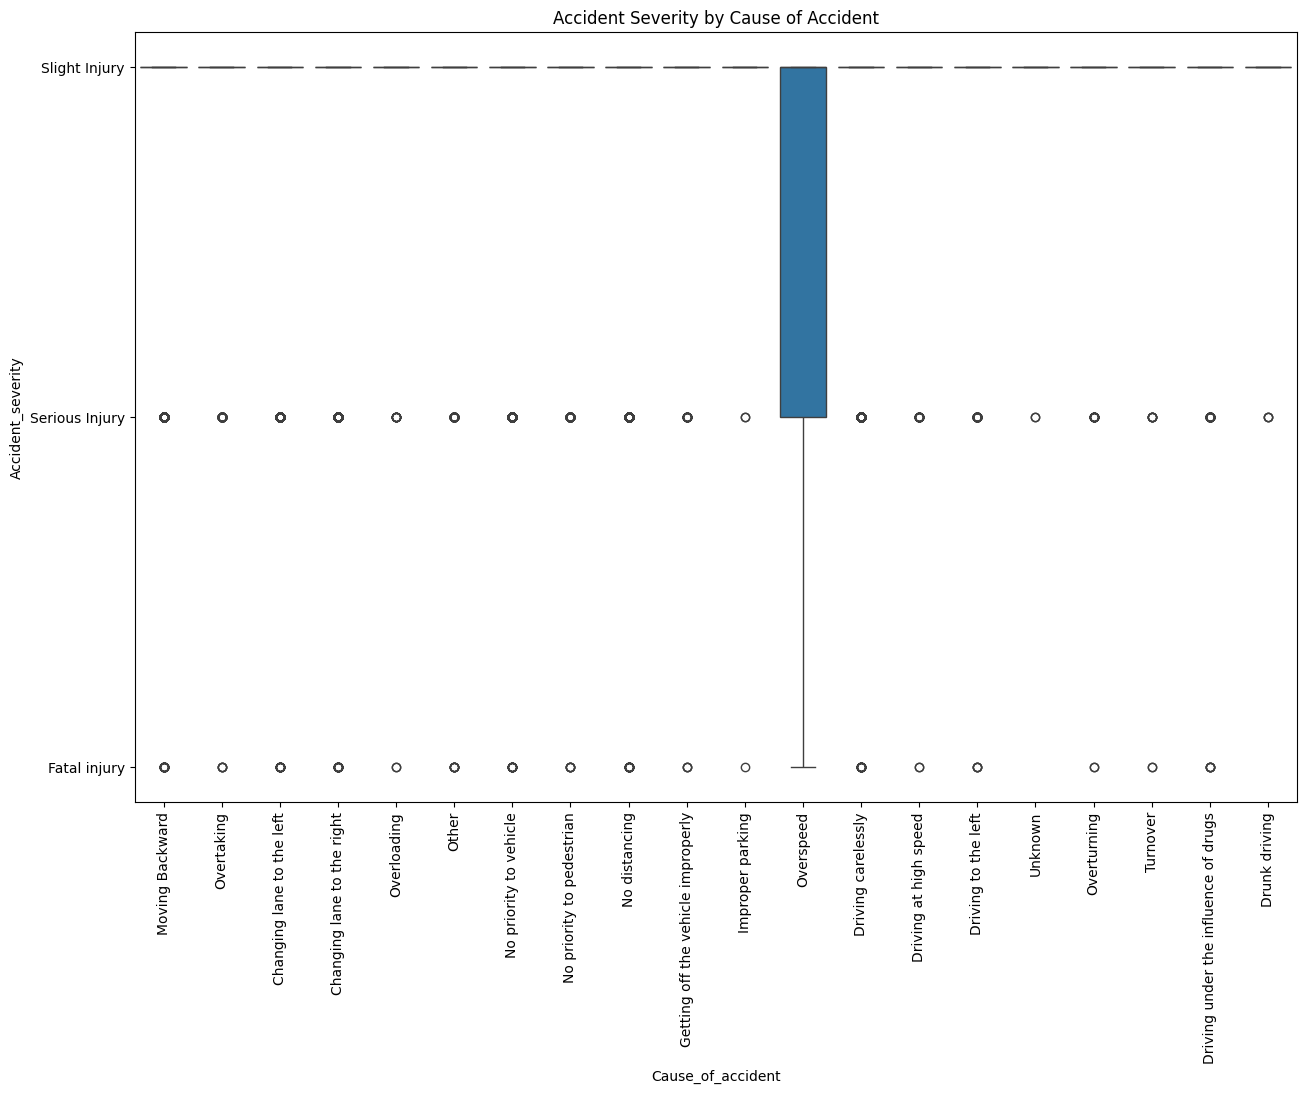

In [53]:
# Boxplots Accident_severity based on Cause_of_accident

import matplotlib.pyplot as plt
# Boxplots of Accident Severity based on Cause of Accident
plt.figure(figsize=(15, 10))
sns.boxplot(x='Cause_of_accident', y='Accident_severity', data=df)
plt.xticks(rotation=90)
plt.title('Accident Severity by Cause of Accident')
plt.show()

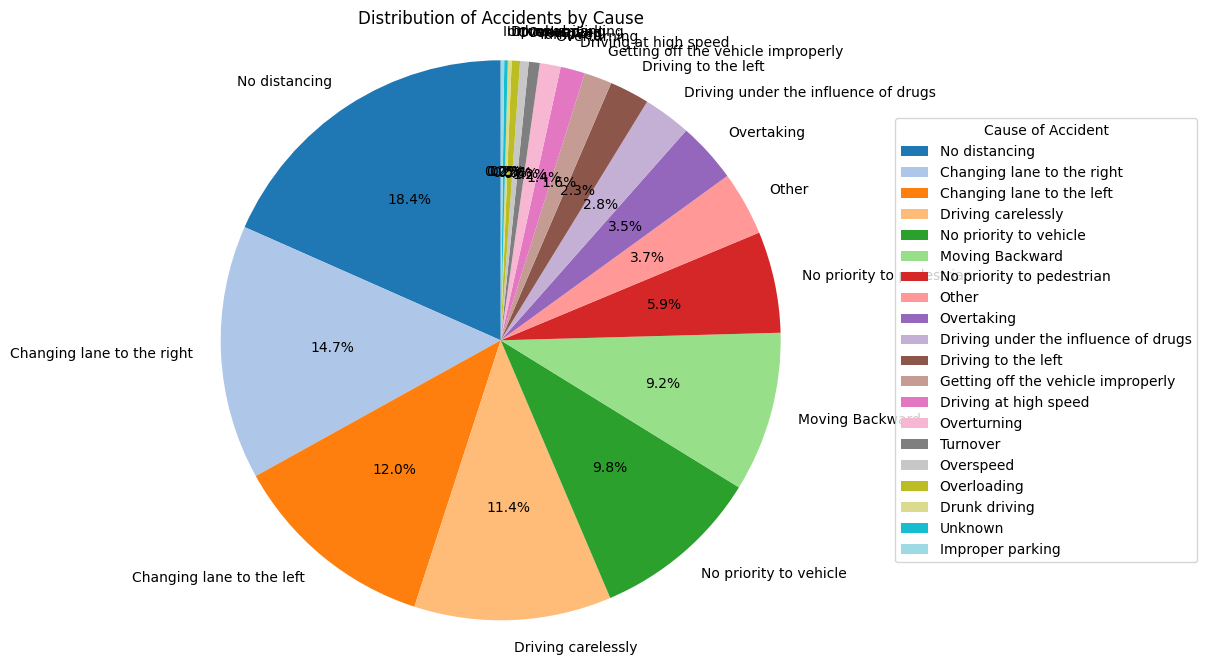

In [54]:
#pie chart Accident_severity Cause_of_accident 'THE NEW FETUER'
cause_counts = df['Cause_of_accident'].value_counts()
colors = plt.cm.tab20.colors

plt.figure(figsize=(10, 8))
plt.pie(cause_counts, labels=cause_counts.index, autopct='%1.1f%%', startangle=90, colors=colors[:len(cause_counts)] )
plt.title('Distribution of Accidents by Cause')
plt.legend(title="Cause of Accident", loc="center left", bbox_to_anchor=(1, 0, 0.5, 1))
plt.axis('equal')
plt.show()

## Feature Selection
- Choose features that you believe will most influence the outcome based on your analysis and the insights from your visualizations. Focus on those that appear most impactful to include in your modeling.

## Train-Test Split
* Divide the dataset into training and testing sets to evaluate the performance of your models.

In [57]:

selected_features = ['Cause_of_accident', 'Accident_severity', 'Driving_experience', 'Age_band_of_driver','Day_of_week']

df_selected = df[selected_features]

print(df_selected.head())


            Cause_of_accident Accident_severity  Driving_experience  \
0             Moving Backward     Slight Injury                   1   
1                  Overtaking     Slight Injury                   4   
2   Changing lane to the left    Serious Injury                   1   
3  Changing lane to the right     Slight Injury                   3   
4                  Overtaking     Slight Injury                   2   

   Age_band_of_driver  Day_of_week  
0                   0            1  
1                   1            1  
2                   0            1  
3                   0            3  
4                   0            3  


In [56]:


from sklearn.model_selection import train_test_split

X = df_encoded.drop('Accident_severity', axis=1)
y = df_encoded['Accident_severity']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)


X_train shape: (9852, 76)
X_test shape: (2464, 76)
y_train shape: (9852,)
y_test shape: (2464,)


## Modeling

Once the data is split into training and testing sets, the next step is to build models to make predictions. Here, we will explore several machine learning algorithms, each with its unique characteristics and suitability for different types of data and problems. You will implement the following models:

### 1. Logistic Regression

### 2. Decision Tree Classifier

### 3. Support Vector Machine (SVM)

### 4. K-Neighbors Classifier

### Implementing the Models
- For each model, use the training data you have prepared to train the model.

#### Logistic Regression

In [59]:

encoder = OneHotEncoder(handle_unknown='ignore')
X_train_encoded = encoder.fit_transform(X_train)

logreg_model = LogisticRegression(max_iter=1000)
logreg_model.fit(X_train_encoded, y_train)

LogisticRegression(max_iter=1000)

#### Decision Tree Classifier

In [61]:

encoder = OneHotEncoder(handle_unknown='ignore')
X_train_encoded = encoder.fit_transform(X_train)

dt_model = DecisionTreeClassifier()
dt_model.fit(X_train_encoded, y_train)


DecisionTreeClassifier()

#### Support Vector Machine (SVM)

In [63]:

encoder = OneHotEncoder(handle_unknown='ignore')
X_train_encoded = encoder.fit_transform(X_train)

svm_model = SVC()
svm_model.fit(X_train_encoded, y_train)

SVC()

#### K-Neighbors Classifier

In [65]:

encoder = OneHotEncoder(handle_unknown='ignore')
X_train_encoded = encoder.fit_transform(X_train)


knn_model = KNeighborsClassifier()
knn_model.fit(X_train_encoded, y_train)


KNeighborsClassifier()

## Model Evaluation

After training your models, it's crucial to evaluate their performance to understand their effectiveness and limitations. This section outlines various techniques and metrics to assess the performance of each model you have implemented.

### Evaluation Techniques
1. **Confusion Matrix**

2. **Accuracy**

3. **Precision and Recall**

4. **F1 Score**

5. **ROC Curve and AUC**

### Implementing Evaluation
- Calculate the metrics listed above using your test data.

In [71]:
from sklearn.metrics import confusion_matrix

#Logistic Regression
X_test_encoded = encoder.transform(X_test)
y_pred_logreg = logreg_model.predict(X_test_encoded)
cm_logreg = confusion_matrix(y_test, y_pred_logreg)
print("Logistic Regression Confusion Matrix:\n", cm_logreg)

#Decision Tree
y_pred_dt = dt_model.predict(X_test_encoded)
cm_dt = confusion_matrix(y_test, y_pred_dt)
print("\nDecision Tree Confusion Matrix:\n", cm_dt)

#SVM
y_pred_svm = svm_model.predict(X_test_encoded)
cm_svm = confusion_matrix(y_test, y_pred_svm)
print("\nSVM Confusion Matrix:\n", cm_svm)

#KNN
y_pred_knn = knn_model.predict(X_test_encoded)
cm_knn = confusion_matrix(y_test, y_pred_knn)
print("\nK-Nearest Neighbors Confusion Matrix:\n", cm_knn)


Logistic Regression Confusion Matrix:
 [[   5    1   31]
 [   0   38  325]
 [   1   32 2031]]

Decision Tree Confusion Matrix:
 [[  20    4   13]
 [   2  151  210]
 [   4  140 1920]]

SVM Confusion Matrix:
 [[   0    0   37]
 [   0    0  363]
 [   0    0 2064]]

K-Nearest Neighbors Confusion Matrix:
 [[   1    0   36]
 [   1   21  341]
 [   1   48 2015]]


In [76]:

from sklearn.metrics import accuracy_score

accuracy_logreg = accuracy_score(y_test, y_pred_logreg)
accuracy_dt = accuracy_score(y_test, y_pred_dt)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
accuracy_knn = accuracy_score(y_test, y_pred_knn)

print("Logistic Regression Accuracy:", accuracy_logreg)
print("Decision Tree Accuracy:", accuracy_dt)
print("SVM Accuracy:", accuracy_svm)
print("K-Nearest Neighbors Accuracy:", accuracy_knn)


Logistic Regression Accuracy: 0.8417207792207793
Decision Tree Accuracy: 0.8486201298701299
SVM Accuracy: 0.8376623376623377
K-Nearest Neighbors Accuracy: 0.8267045454545454


In [73]:

from sklearn.metrics import precision_score, recall_score


precision_logreg = precision_score(y_test, y_pred_logreg, average='weighted')
recall_logreg = recall_score(y_test, y_pred_logreg, average='weighted')
print("\nLogistic Regression:")
print("Precision:", precision_logreg)
print("Recall:", recall_logreg)

precision_dt = precision_score(y_test, y_pred_dt, average='weighted')
recall_dt = recall_score(y_test, y_pred_dt, average='weighted')
print("\nDecision Tree:")
print("Precision:", precision_dt)
print("Recall:", recall_dt)

precision_svm = precision_score(y_test, y_pred_svm, average='weighted')
recall_svm = recall_score(y_test, y_pred_svm, average='weighted')
print("\nSVM:")
print("Precision:", precision_svm)
print("Recall:", recall_svm)

precision_knn = precision_score(y_test, y_pred_knn, average='weighted')
recall_knn = recall_score(y_test, y_pred_knn, average='weighted')
print("\nK-Nearest Neighbors:")
print("Precision:", precision_knn)
print("Recall:", recall_knn)




Logistic Regression:
Precision: 0.8040940036794378
Recall: 0.8417207792207793

Decision Tree:
Precision: 0.8374549662099489
Recall: 0.8486201298701299


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))



SVM:
Precision: 0.7016781919379322
Recall: 0.8376623376623377

K-Nearest Neighbors:
Precision: 0.7554818370035761
Recall: 0.8267045454545454


In [74]:

from sklearn.metrics import f1_score

f1_logreg = f1_score(y_test, y_pred_logreg, average='weighted')
print("\nLogistic Regression F1-score:", f1_logreg)

f1_dt = f1_score(y_test, y_pred_dt, average='weighted')
print("Decision Tree F1-score:", f1_dt)

f1_svm = f1_score(y_test, y_pred_svm, average='weighted')
print("SVM F1-score:", f1_svm)

f1_knn = f1_score(y_test, y_pred_knn, average='weighted')
print("KNN F1-score:", f1_knn)



Logistic Regression F1-score: 0.7937442938709484
Decision Tree F1-score: 0.8417381214794277
SVM F1-score: 0.7636638979395164
KNN F1-score: 0.7726543434311051


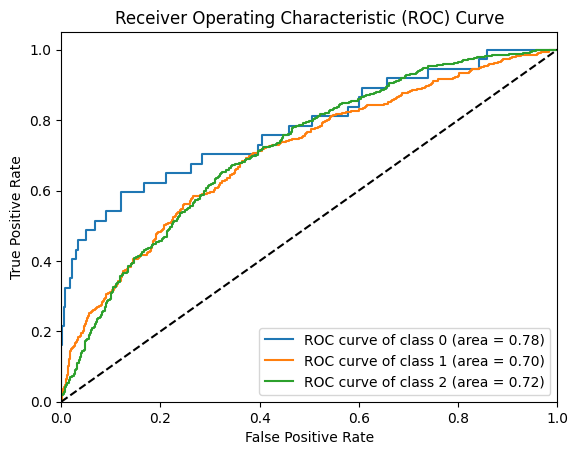

In [75]:

import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier

y_test_binarized = label_binarize(y_test, classes=np.unique(y_test))
n_classes = y_test_binarized.shape[1]


classifier = OneVsRestClassifier(logreg_model)
y_score = classifier.fit(X_train_encoded, y_train).decision_function(X_test_encoded)


fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])


fpr["micro"], tpr["micro"], _ = roc_curve(y_test_binarized.ravel(), y_score.ravel())
roc_auc["micro"] = auc(fpr["micro"], tpr["micro"])


plt.figure()
for i in range(n_classes):
    plt.plot(fpr[i], tpr[i], label='ROC curve of class {0} (area = {1:0.2f})'
                                   ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc="lower right")
plt.show()


## Project Questions:

### Comparative Analysis

- **Compare Metrics**: Examine the performance metrics (such as accuracy, precision, and recall) of each model. Document your observations on which model performs best for your dataset and the problem you're addressing.
- **Evaluate Trade-offs**: Discuss the trade-offs you encountered when choosing between models. Consider factors like computational efficiency, ease of implementation, and model interpretability.
- **Justify Your Choice**: After comparing and evaluating, explain why you believe one model is the best choice. Provide a clear rationale based on the performance metrics and trade-offs discussed.
- **Feature Importance**: Identify and discuss the most important features for the best-performing model. How do these features impact the predictions? Use the visualizations you have created to justify your answer if necessary.
- **Model Limitations**: Discuss any limitations you encountered with the models you used. Are there any aspects of the data or the problem that these models do not handle well?
- **Future Improvements**: Suggest potential improvements or further steps you could take to enhance model performance. This could include trying different algorithms, feature engineering techniques, or tuning hyperparameters.

### Answer Here:
Compare Metrics:

Evaluate Trade-offs:

Justify Your Choice:

Feature Importance:

Model Limitations:

Future Improvements:
